In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
import matplotlib.animation as manimation

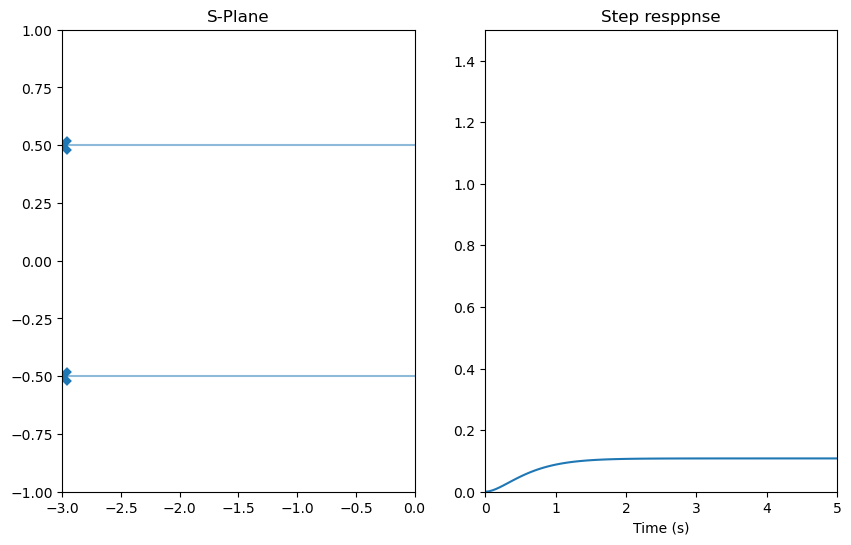

In [4]:
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Changing Real part of Pole', artist='Matplotlib',
                comment='visualize moving along lines of constant alpha')
writer = FFMpegWriter(fps=5, metadata=metadata)

# Initialize the movie
fig, ax = plt.subplots(1,2,figsize=(10,6))

n_alpha = 10
alpha = np.linspace(0,3,n_alpha)
beta = 0.5*np.ones(n_alpha)
t = np.linspace(0,5,100)

# Update the frames for the movie
with writer.saving(fig, "constant alpha.mp4", 100):
    for ii in range(n_alpha):
        ax[0].clear()
        ax[0].plot(-alpha,beta,alpha=0.5)
        ax[0].plot(-alpha,-beta,alpha=0.5, color='C0')
        ax[0].scatter(-alpha[ii], beta[ii], s=100, marker='x', linewidth=5, label='Pole' )
        ax[0].scatter(-alpha[ii], -beta[ii], s=100, marker='x', linewidth=5, label='Pole', color='C0' )
        
        #ax[0].set_xlim(-1,1)
        ax[0].set_title('S-Plane')
        #ax[0].set_ylabel('Height')
        ax[0].set_ylim(-1,1)
        ax[0].set_xlim(-3,0)

        G = ct.tf([0, 0, 1], [1, 2*alpha[ii], alpha[ii]**2+beta[ii]**2])
        g_step = ct.step_response(G,T=t)
        ax[1].clear()
        ax[1].plot(t,np.squeeze(g_step.y))
        ax[1].set_xlim(0,5)
        ax[1].set_ylim(0,1.5)
        ax[1].set_title('Step resppnse')
        ax[1].set_xlabel('Time (s)')
        
        writer.grab_frame()